# Modèle de PFB channelizer
- Fs = 3.7 GS/s
- RF_band = 1.850 GHz
- 16 samples in parallel to feed a PFB with decimation factor M=16
- Each channel is 1.8GHz/16 = 115.625 MHz wide
- R=5-tap filter -> Base filter is MxR-coefficient long

In [23]:
Fs = 3.7e9
F_ny = Fs/2
M = 8
DECIMATE_BY = M
B_chan = F_ny / M
R = 5
L = M*R

print(f"{Fs = }\n"
      f"{F_ny = }\n"
      f"{M = }\n"
      f"{B_chan = }\n"
      f"{R = }\n"
      f"{L = }\n"
     )

Fs = 3700000000.0
F_ny = 1850000000.0
M = 8
B_chan = 231250000.0
R = 5
L = 40



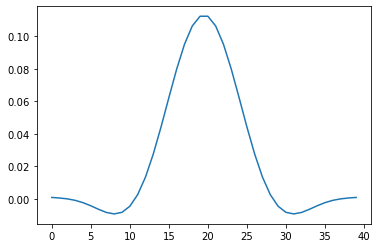

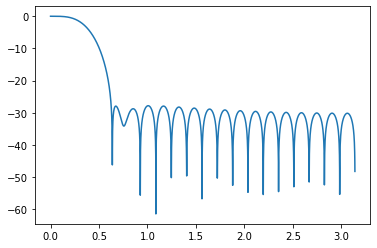

In [28]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import channelizer
import importlib
importlib.reload(channelizer)

# Design FIR Filter
channel_num = M
cutoff = 1 / channel_num / 2    # Desired cutoff digital frequency
trans_width = cutoff / 10  # Width of transition from pass band to stop band
numtaps = L      # Size of the FIR filter.
#taps = scipy.signal.remez(numtaps, [0, cutoff - trans_width, cutoff + trans_width, 0.5],[1, 0])
normalized_cutoff = 1./(DECIMATE_BY+.1*DECIMATE_BY)
taps = scipy.signal.firwin(numtaps, normalized_cutoff)
channelizer = channelizer.Channelizer(taps, channel_num)

plt.figure()
plt.plot(taps)

w, h = channelizer.sweep_freqz()
plt.figure()
plt.plot(w, 10*np.log10(abs(h)))

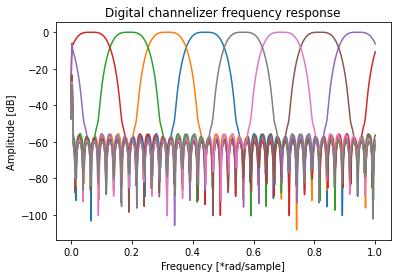

In [25]:
w, a = channelizer.sweep_freqz()

plt.plot(w,a.T)
plt.title('Digital channelizer frequency response')
plt.xlabel('Frequency [*rad/sample]')
plt.ylabel('Amplitude [dB]')
plt.show()

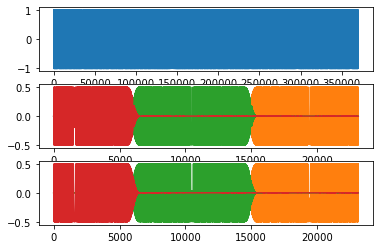

In [25]:
import numpy

f0 = 1e9
f1 = 1.6e9
t1 = 0.0001


# 
T = 0.0001

t = numpy.arange(0, int(T*Fs)) / Fs

s = scipy.signal.chirp(t, f0, t1, f1)


ss = channelizer.dispatch(s)

plt.subplot(311)
plt.plot(numpy.real(s))
plt.subplot(312)
plt.plot(numpy.real(ss[0:4].T))
plt.subplot(313)
plt.plot(numpy.imag(ss[0:4].T))

plt.show()

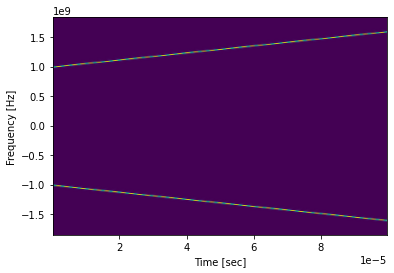

In [31]:
f, t, Sxx = scipy.signal.spectrogram(s, Fs, return_onesided=False)
plt.pcolormesh(t, numpy.fft.fftshift(f), numpy.fft.fftshift(Sxx, axes=0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

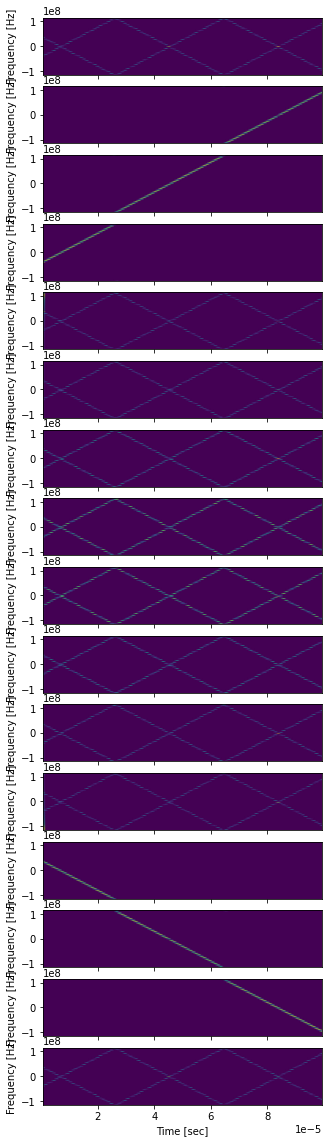

In [39]:
fig, axs = plt.subplots(M, 1, sharex=True, sharey=True, figsize=(5,20))
for sb in range(M):
    f, t, Sxx = scipy.signal.spectrogram(ss[sb], Fs/M, return_onesided=False)
    axs[sb].pcolormesh(t, numpy.fft.fftshift(f), numpy.fft.fftshift(Sxx, axes=0), shading='gouraud')
    axs[sb].set_ylabel('Frequency [Hz]')
axs[-1].set_xlabel('Time [sec]')
plt.show()